In [1]:
%-Welcome
spm('asciiwelcome');
[vspm,rspm] = spm('Ver');
tlkt = ver(spm_check_version);
fprintf('%s, version %s\n',vspm,rspm);
fprintf('%s, version %s\n',tlkt.Name,version);

 ___  ____  __  __                                            
/ __)(  _ \(  \/  )                                           
\__ \ )___/ )    (   Statistical Parametric Mapping           
(___/(__)  (_/\/\_)  SPM12 - https://www.fil.ion.ucl.ac.uk/spm/

SPM12, version 7771
Octave, version 7.3.0


In [2]:
%-Working directory
wd = fullfile(getenv('HOME'),'data');
cd(wd);

In [3]:
%-Input data
ref = spm_vol(fullfile(wd,'T1w.nii'));
src = spm_vol(fullfile(wd,'bold.nii'));

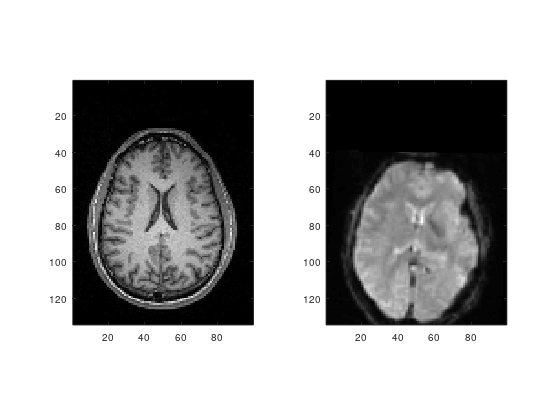

In [4]:
%-Display
A = spm_slice_vol(ref,spm_matrix([0 0 70]),ref.dim(1:2),1);
F = spm_slice_vol(src,src.mat\ref.mat*spm_matrix([0 0 70]),ref.dim(1:2),1);
subplot(1,2,1), imagesc(rot90(A)), axis image
subplot(1,2,2), imagesc(rot90(F)), axis image
colormap gray

In [5]:
%-Coregister
x = spm_coreg(ref, src);
x = spm_matrix(x);


SPM12: spm_coreg (v7320)                           17:50:27 - 12/01/2023
Completed                               :          17:51:38 - 12/01/2023


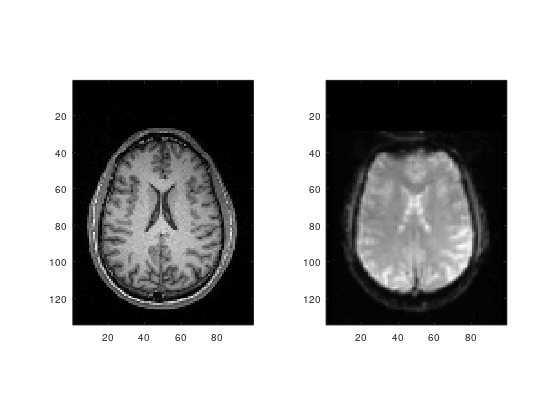

In [6]:
%-Display
A = spm_slice_vol(ref,spm_matrix([0 0 70]),ref.dim(1:2),1);
F = spm_slice_vol(src,x\src.mat\ref.mat*spm_matrix([0 0 70]),ref.dim(1:2),1);
subplot(1,2,1), imagesc(rot90(A)), axis image
subplot(1,2,2), imagesc(rot90(F)), axis image
colormap gray

In [7]:
%-Save transformation in NIfTI header and reslice
% spm_get_space(src.fname, x \ spm_get_space(src.fname));
% spm_reslice([ref,src], struct('mean',false,'which',1));